<a href="https://colab.research.google.com/github/KonstantinSV/Linear-Regression-and-Core-Python-Libraries-for-Data-Analysis-and-Scientific-Computing/blob/main/Decision_peer_review_linreg_height_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Корректность проверена на Python 3.6:**
+ pandas 0.23.4
+ numpy 1.15.4
+ matplotlib 3.0.2
+ seaborn 0.9.0

# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений

Это задание посвящено линейной регрессии. На примере прогнозирования роста человека по его весу Вы увидите, какая математика за этим стоит, а заодно познакомитесь с основными библиотеками Python, необходимыми для дальнейшего прохождения курса.

**Материалы**

- Лекции данного курса по линейным моделям и градиентному спуску
- [Документация](http://docs.scipy.org/doc/) по библиотекам NumPy и SciPy
- [Документация](http://matplotlib.org/) по библиотеке Matplotlib 
- [Документация](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) по библиотеке Pandas
- [Pandas Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Документация](http://stanford.edu/~mwaskom/software/seaborn/) по библиотеке Seaborn 

## Задание 1. Первичный анализ данных c Pandas

В этом заданиии мы будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

**[1].** Если у Вас не установлена библиотека Seaborn - выполните в терминале команду *conda install seaborn*. (Seaborn не входит в сборку Anaconda, но эта библиотека предоставляет удобную высокоуровневую функциональность для визуализации данных).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Считаем данные по росту и весу (*weights_heights.csv*, приложенный в задании) в объект Pandas DataFrame:

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Курс 2. Обучение на размеченных данных/Tasks/Первая неделя/Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений/weights_heights.csv', index_col='Index')

In [ ]:
data

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
...,...,...
24996,69.50215,118.0312
24997,64.54826,120.1932
24998,64.69855,118.2655


Чаще всего первое, что надо надо сделать после считывания данных - это посмотреть на первые несколько записей. Так можно отловить ошибки чтения данных (например, если вместо 10 столбцов получился один, в названии которого 9 точек с запятой). Также это позволяет познакомиться с данными, как минимум, посмотреть на признаки и их природу (количественный, категориальный и т.д.). 

После этого стоит построить гистограммы распределения признаков - это опять-таки позволяет понять природу признака (степенное у него распределение, или нормальное, или какое-то еще). Также благодаря гистограмме можно найти какие-то значения, сильно не похожие на другие - "выбросы" в данных. 
Гистограммы удобно строить методом *plot* Pandas DataFrame с аргументом *kind='hist'*.

**Пример.** Построим гистограмму распределения роста подростков из выборки *data*. Используем метод *plot* для DataFrame *data* c аргументами *y='Height'* (это тот признак, распределение которого мы строим)

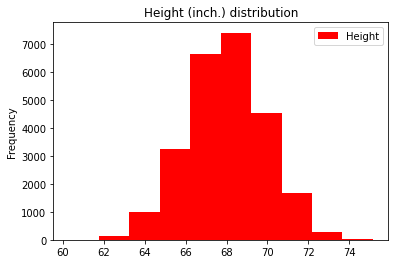

In [ ]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

Аргументы:

- *y='Height'* - тот признак, распределение которого мы строим
- *kind='hist'* - означает, что строится гистограмма
- *color='red'* - цвет

**[2]**. Посмотрите на первые 5 записей с помощью метода *head* Pandas DataFrame. Нарисуйте гистограмму распределения веса с помощью метода *plot* Pandas DataFrame. Сделайте гистограмму зеленой, подпишите картинку.

In [ ]:
# Ваш код здесь
five_string = pd.DataFrame.head(data) # или data.head(5)
five_string

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


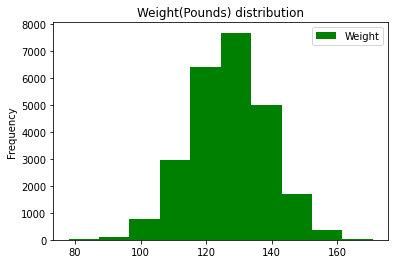

In [ ]:
data.plot(y='Weight', kind='hist', 
           color='green',  title= 'Weight(Pounds) distribution')

Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается $m \times m$ графиков (*m* - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода $scatter\_matrix$ Pandas Data Frame или *pairplot* библиотеки Seaborn. 

Чтобы проиллюстрировать этот метод, интересней добавить третий признак. Создадим признак *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого воспользуемся удобной связкой метода *apply* Pandas DataFrame и lambda-функций Python.

In [ ]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / (height_inch / METER_TO_INCH) ** 2

In [ ]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], row['Weight']), axis=1)

In [ ]:
data

,Height,Weight,BMI
Index,,,
1,65.78331,112.9925,18.357573
2,71.51521,136.4873,18.762577
3,69.39874,153.0269,22.338895
4,68.21660,142.3354,21.504526
5,67.78781,144.2971,22.077581
...,...,...,...
24996,69.50215,118.0312,17.178982
24997,64.54826,120.1932,20.281866
24998,64.69855,118.2655,19.863971


**[3].** Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод *pairplot* библиотеки Seaborn.

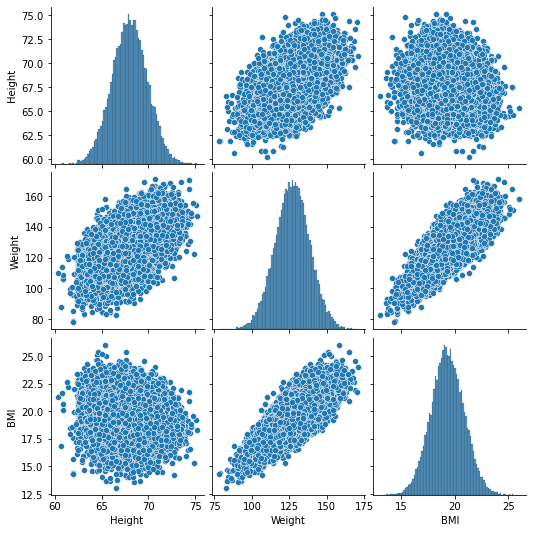

In [ ]:
# Ваш код здесь
sns.pairplot(data)

Часто при первичном анализе данных надо исследовать зависимость какого-то количественного признака от категориального (скажем, зарплаты от пола сотрудника). В этом помогут "ящики с усами" - boxplots библиотеки Seaborn. Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других. 

**[4]**. Создайте в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод *boxplot* библиотеки Seaborn и метод *apply* Pandas DataFrame. Подпишите ось *y* меткой «Рост», ось *x* – меткой «Весовая категория».

Text(0, 0.5, '$Рост$')

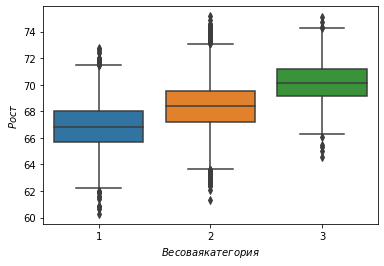

In [ ]:
def weight_category(weight):
  # Ваш код здесь
    if weight < 120:
      return 1
    elif weight >= 150:
      return 3
    else:
      return 2


data['weight_cat'] = data['Weight'].apply(weight_category) # добавили в данные столбец weight_cat
# Ваш код здесь

sns.boxplot(x="weight_cat", y="Height", data=data)
plt.xlabel('$Весовая категория$')
plt.ylabel('$Рост$')


**[5].** Постройте scatter plot зависимости роста от веса, используя метод *plot* для Pandas DataFrame с аргументом *kind='scatter'*. Подпишите картинку.

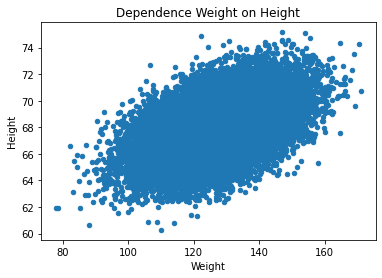

In [ ]:
# Ваш код здесь
data.plot(x='Weight', y = 'Height', kind='scatter', title= 'Dependence Weight on Height')

## Задание 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

**[6].** Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [ ]:
# Ваш код здесь
def quadrat_error(w_0, w_1): # функция квадратичной ошибки
  return np.sum((data['Height'] - (w_0 + w_1 * data['Weight'])) ** 2)




Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

**[7].** Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Используйте метод *plot* из *matplotlib.pyplot*, а также метод *linspace* библиотеки NumPy. Подпишите оси и график.

<Figure size 432x288 with 0 Axes>

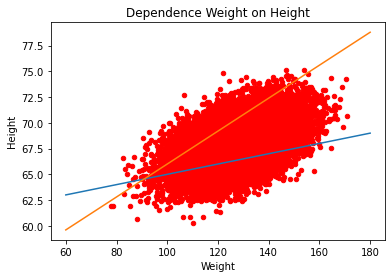

In [ ]:
# Ваш код здесь
x = np.linspace(60, 180) # 60 и 180 произвольные цифры, начало и конец обоих линейных графиков
y_1 = 60 + 0.05 * x
y_2 = 50 + 0.16 * x
plt.figure() # позволяет добавлять на существующий график, дополнительные графики. На data.plot добавлены plt.plot(x, y_1) и plt.plot(x, y_2)
data.plot(x='Weight', y = 'Height', kind='scatter', color='red', title= 'Dependence Weight on Height')
plt.plot(x, y_1)
plt.plot(x, y_2)


Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

**[8].** Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.

Text(0.5, 1.0, 'Зависимость ошибки от w1 при w0=50')

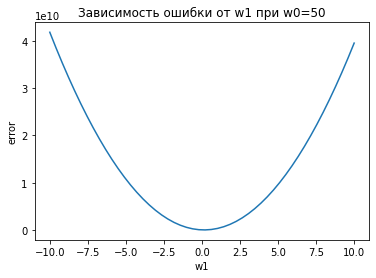

In [ ]:
# Ваш код здесь
w1=np.linspace(-10,10) # происвольный интервал был выбран что бы в него попал 0
w0=[50]*len(w1) # что бы получить список из цифры 50 с количеством элементов таним же как длин w1
e = [] # список с числами возвращенными функцией quadrat_error, то есть список квадратичных ошибок на для всех w1 на промежутке от -10 до 10 и постоянной w0 = 50
for x, y in zip(w0,w1): # quadrat_error требует два аргумента, поэтому итерируемся срезу по двум с помощью zip
    e.append(quadrat_error(x, y))

p = plt.plot(w1,e)
plt.xlabel('w1')
plt.ylabel('error')
plt.title(u'Зависимость ошибки от w1 при w0=50')

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

**[9].** С помощью метода *minimize_scalar* из *scipy.optimize* найдите минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в п. 8 оптимальное значение параметра $w_1$. 

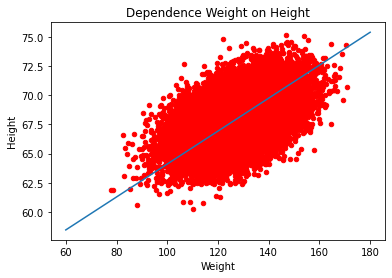

In [ ]:
#Ваш код здесь
from scipy.optimize import minimize_scalar

def quadrat_error_constant_w_0(w_1): # пишем ф-ию с одной переменной, так как minimize_scalar принимает только f(x)
  return np.sum((data['Height'] - (50 + w_1 * data['Weight'])) ** 2)

w_1_opt = minimize_scalar(quadrat_error_constant_w_0, bounds = (-5, 5))

data.plot(x='Weight', y = 'Height', kind='scatter', color='red', title= 'Dependence Weight on Height')
y = 50 + w_1_opt.x * x # .x позволяет обращаться к только к результату оптимизации
plt.plot(x, y) # Еще один вариант plt.plot(x, 50 + w1_opt.x * x) первый х определен выше, второй это результат оптимизации, третий х тот же что и первый




При анализе многомерных данных человек часто хочет получить интуитивное представление о природе данных с помощью визуализации. Увы, при числе признаков больше 3 такие картинки нарисовать невозможно. На практике для визуализации данных в 2D и 3D в данных выделаяют 2 или, соответственно, 3 главные компоненты (как именно это делается - мы увидим далее в курсе) и отображают данные на плоскости или в объеме. 

Посмотрим, как в Python рисовать 3D картинки, на примере отображения функции $z(x,y) = sin(\sqrt{x^2+y^2})$ для значений $x$ и $y$ из интервала [-5,5] c шагом 0.25.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

Создаем объекты типа matplotlib.figure.Figure (рисунок) и  matplotlib.axes._subplots.Axes3DSubplot (ось). 

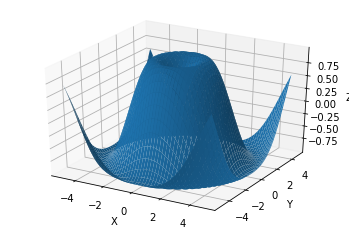

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.05)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**[10].** Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».

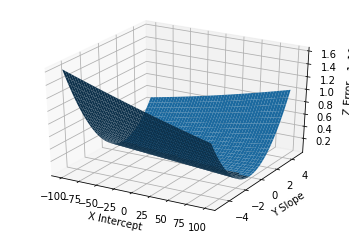

In [ ]:
# Ваш код здесь
figur = plt.figure()
axis_3 = figur.gca(projection='3d') # get current axis

w0 = np.arange(-100, 100) # Произвольные числа для создания вектора
w1 = np.arange(-5, 5, 0.25) # Произвольные числа для создания вектора
w0, w1 = np.meshgrid(w0, w1) # создать две матрицы с координатами из массива значений x и массива значений Y 

def error_arr(w0,w1): # ф-ия вернет матрицу z результатов quadrat_error когда  w0 и w1 принимают значения w0 равное количеству строк,  w1 равное количеству столбцов
    a=w0.shape[0] # Количество строк из матрицы w0
    b=w0.shape[1] # Количество столбцов из матрицы w0
    Z=np.zeros((a,b)) # нулевая матрица размерами (a,b)
    for i in range(a):
        for j in range(b):
            Z[i,j]=quadrat_error(w0[i,j],w1[i,j])
    return Z

z = error_arr(w0,w1)

surf = axis_3.plot_surface(w0, w1, z) 
axis_3.set_xlabel('X Intercept')
axis_3.set_ylabel('Y Slope')
axis_3.set_zlabel('Z Error')
plt.show()


**[11].** С помощью метода *minimize* из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишите оси и график.

In [ ]:
from scipy.optimize import minimize

In [ ]:
# Ваш код здесь
def quadrat_error_one_var(w): # функция квадратичной ошибки как в пункте [6] но с одним параметром
    return np.sum((data['Height']-(w[0]+w[1]*data['Weight']))**2)

x0 = [0,0]
opt = minimize(quadrat_error_one_var, x0, method='L-BFGS-B', bounds = [(-100, 100), (-5, 5)])
opt

      fun: 67545.28708667471
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00291038, 0.        ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 4
   status: 0
  success: True
        x: array([57.57179162,  0.08200637])

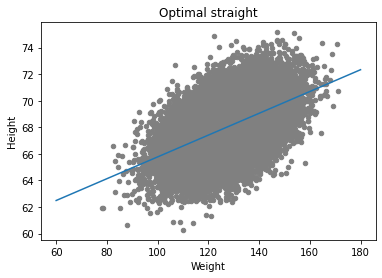

In [ ]:
# Ваш код здесь
data.plot(x='Weight', y = 'Height', kind='scatter', color='grey', title= 'Optimal straight')
y = opt.x[0] + opt.x[1] * x # .x позволяет обращаться только к результату оптимизации
plt.plot(x, y)

## Критерии оценки работы

- Выполняется ли тетрадка IPython без ошибок? (15 баллов)
- Верно ли отображена гистограмма распределения роста из п. 2? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображены попарные зависимости признаков из п. 3? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображена зависимость роста от весовой категории из п. 4? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображен scatter plot роста от веса из п. 5? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Правильно ли реализована функция подсчета квадратичной ошибки из п. 6? (10 баллов)
- Правильно ли нарисован график из п. 7? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли нарисован график из п. 8? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли используется метод minimize\_scalar из scipy.optimize? (6 баллов). Правильно ли нарисован график из п. 9? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли нарисован 3D-график из п. 10? (6 баллов) Правильно ли оформлены подписи? (1 балл)
- Правильно ли используется метод minimize из scipy.optimize? (6 баллов). Правильно ли нарисован график из п. 11? (3 балла). Правильно ли оформлены подписи? (1 балл)